In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import NA, NaT

### Leer .csv pasanti

In [2]:
df_pasanti_sygnals=pd.read_csv("pasanti_sygnals.csv")

In [3]:
df_sygnals=df_pasanti_sygnals.copy()
df_sygnals.drop(columns="Unnamed: 0",inplace=True)

In [4]:
df_pasanti_sygnals["message_link"]

0         https://t.me/VIP_Futures_Spot_Signals/203
1         https://t.me/VIP_Futures_Spot_Signals/281
2         https://t.me/VIP_Futures_Spot_Signals/321
3         https://t.me/VIP_Futures_Spot_Signals/333
4         https://t.me/VIP_Futures_Spot_Signals/352
                           ...                     
1549    https://t.me/FedRussianInsidersFreeVIP/2614
1550    https://t.me/FedRussianInsidersFreeVIP/2621
1551    https://t.me/FedRussianInsidersFreeVIP/2628
1552    https://t.me/FedRussianInsidersFreeVIP/2635
1553    https://t.me/FedRussianInsidersFreeVIP/2636
Name: message_link, Length: 1554, dtype: object

### Ajustar los tipos de datos

In [5]:
# determinar que tipo de datos hay en el data frame.
df_sygnals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             1554 non-null   object 
 1   symbol                          1554 non-null   object 
 2   is_long                         1554 non-null   bool   
 3   is_entry_market                 1554 non-null   bool   
 4   entry_targets                   1554 non-null   object 
 5   take_profit_targets             1554 non-null   object 
 6   stop_targets                    1554 non-null   object 
 7   date                            1554 non-null   object 
 8   channel                         1554 non-null   object 
 9   message_link                    1554 non-null   object 
 10  dates_entry                     1544 non-null   object 
 11  dates_stoploss                  1544 non-null   object 
 12  dates_profit                    15

In [6]:
# convertir los datos tipo str a un typo de dato mas adecuado
df_sygnals=df_sygnals.convert_dtypes()

In [7]:
df_sygnals.columns

Index(['_id', 'symbol', 'is_long', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'date', 'channel',
       'message_link', 'dates_entry', 'dates_stoploss', 'dates_profit',
       'efficiency', 'error_ta_recomendation', 'error_prophettesting',
       'error_backtesting', 'primary_currencies', 'segundary_currencies',
       'type_leverage', 'is_cross_leverage', 'percent_leverage',
       'percent_trailing_configuration', 'AO', 'RSI', 'ADX', 'CCI20', 'Stoch',
       'first_dates_entry', 'first_dates_stoploss', 'first_dates_profit'],
      dtype='object')

### ajustar los datos de fechas

In [8]:
# pasar los datos str a datetime
df_sygnals['date']=pd.to_datetime(df_sygnals['date'])

In [9]:
# extraer la primera fecha del conjunto de fechas.
def extrat(x):
  if type(x) == type(NA):
    return x
  if x == "False":
    return False
  if x == "never":
    return "never"
  else:
    return pd.to_datetime(x)


In [10]:
df_sygnals['first_dates_entry']=df_sygnals['first_dates_entry'].agg(lambda x: extrat(x))
df_sygnals['first_dates_stoploss']=df_sygnals['first_dates_stoploss'].agg(lambda x: extrat(x))
df_sygnals['first_dates_profit']=df_sygnals['first_dates_profit'].agg(lambda x: extrat(x))

## Calcular el tiempo transcurrido entre fechas

In [11]:
# crear un df con las columnas de tiempo
df_times=df_sygnals.loc[:,["date","first_dates_profit","first_dates_stoploss","first_dates_entry"]]
df_times

,date,first_dates_profit,first_dates_stoploss,first_dates_entry
0,2020-08-28 10:19:36,False,False,False
1,2020-09-14 07:10:46,False,False,False
2,2020-09-20 00:30:24,False,False,False
3,2020-09-23 07:41:41,False,False,False
4,2020-10-09 08:59:19,False,False,False
...,...,...,...,...
1549,2022-06-14 15:28:40,2022-06-15 14:45:00,never,2022-06-14 15:30:00
1550,2022-06-15 12:10:40,2022-06-15 14:40:00,never,2022-06-15 12:15:00
1551,2022-06-16 11:50:41,2022-06-20 06:10:00,never,2022-06-16 12:25:00
1552,2022-06-17 13:22:41,False,False,False


In [12]:
# funcion que calcula la diferencia entre dos fechas
def delta_time(d,e):
  d_e=False
  if type(e)==type(d) and type(e)!= bool and e is not NA:
    d_e=e-d
    d_e=d_e.total_seconds()
  return d_e

In [13]:
# nuevas columnas de diferencias entre fechas
df_times["d_e"]=df_times.agg(lambda x: delta_time(x.date,x.first_dates_entry),axis=1)
df_times["d_p"]=df_times.agg(lambda x: delta_time(x.date,x.first_dates_profit),axis=1)
df_times["e_p"]=df_times.agg(lambda x: delta_time(x.first_dates_entry,x.first_dates_profit),axis=1)
df_times["d_s"]=df_times.agg(lambda x: delta_time(x.date,x.first_dates_stoploss),axis=1)

In [14]:
#pd.concat([df_times,df_sygnals[[""]]]

In [15]:
# para ver los segundo en deltatime
str(timedelta(seconds=153229.7503816794))
str(timedelta(seconds=233928.42055084746))
str(timedelta(seconds=36378571.0))

'421 days, 1:09:31'

In [16]:
# sns.set(rc={'figure.figsize':(20,120)},font_scale=1.7)
# sns.violinplot(data=df_times[["d_e"]])

In [17]:
# Calcular los min, max, mena, median y mostrar en formato timedelta

pd.concat([
    (df_times[df_times["d_e"]!=False]["d_e"].agg([min,max,np.mean,np.median])).apply(lambda x: str(timedelta(seconds=x))),
    df_times[df_times["d_p"]!=False]["d_p"].agg([min,max,np.mean,np.median]).apply(lambda x: str(timedelta(seconds=x))),
    df_times[df_times["e_p"]!=False]["e_p"].agg([min,max,np.mean,np.median]).apply(lambda x: str(timedelta(seconds=x))),
    df_times[df_times["d_s"]!=False]["d_s"].agg([min,max,np.mean,np.median]).apply(lambda x: str(timedelta(seconds=x))),
],axis=1)

,d_e,d_p,e_p,d_s
min,0:00:01,0:00:36,0:05:00,0:00:42
max,"421 days, 1:09:31","421 days, 1:09:31","45 days, 1:10:00","584 days, 7:21:29"
mean,"1 day, 18:37:44.046636","2 days, 17:02:56.488865",21:42:22.708333,"21 days, 16:48:22.957447"
median,0:07:42.500000,6:28:34,4:45:00,"5 days, 23:12:25"


## Cantidad de señales por canal

In [18]:
df_sygnals["channel"].replace(['𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔','Crypto Futures Spot Signals😘'],["Coin|Coach|Signals","Crypto Futures Spot Signals"],inplace=True)

In [19]:
plt.rcParams["figure.figsize"] = (20,10)

<AxesSubplot:xlabel='channel', ylabel='Count'>

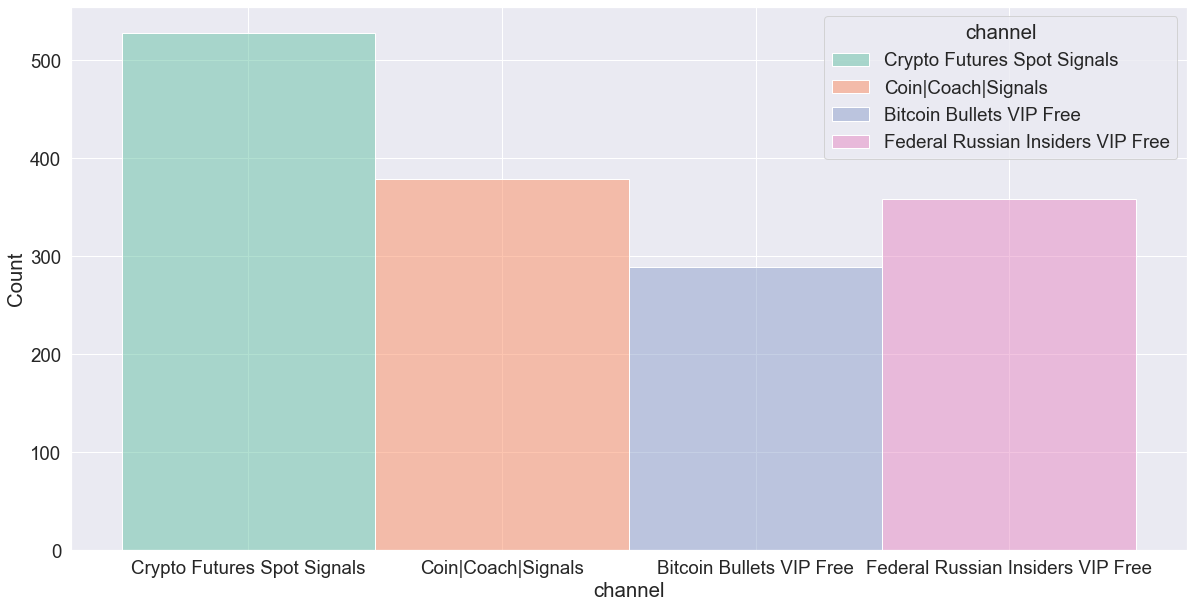

In [20]:
sns.set(rc={'figure.figsize':(20,10)},font_scale=1.7)
sns.histplot(df_sygnals,x="channel",hue="channel" , palette="Set2")


## eficiencia de señales por canal

In [21]:
channels=df_sygnals["channel"].unique()
channels

<StringArray>
[      'Crypto Futures Spot Signals',                'Coin|Coach|Signals',
          'Bitcoin Bullets VIP Free', 'Federal Russian Insiders VIP Free']
Length: 4, dtype: string

In [22]:
efficiency_by_channel=df_sygnals[["channel","efficiency","symbol"]].groupby("channel")

Text(0.5, 1.0, 'Distribucion de eficiencia por canal')

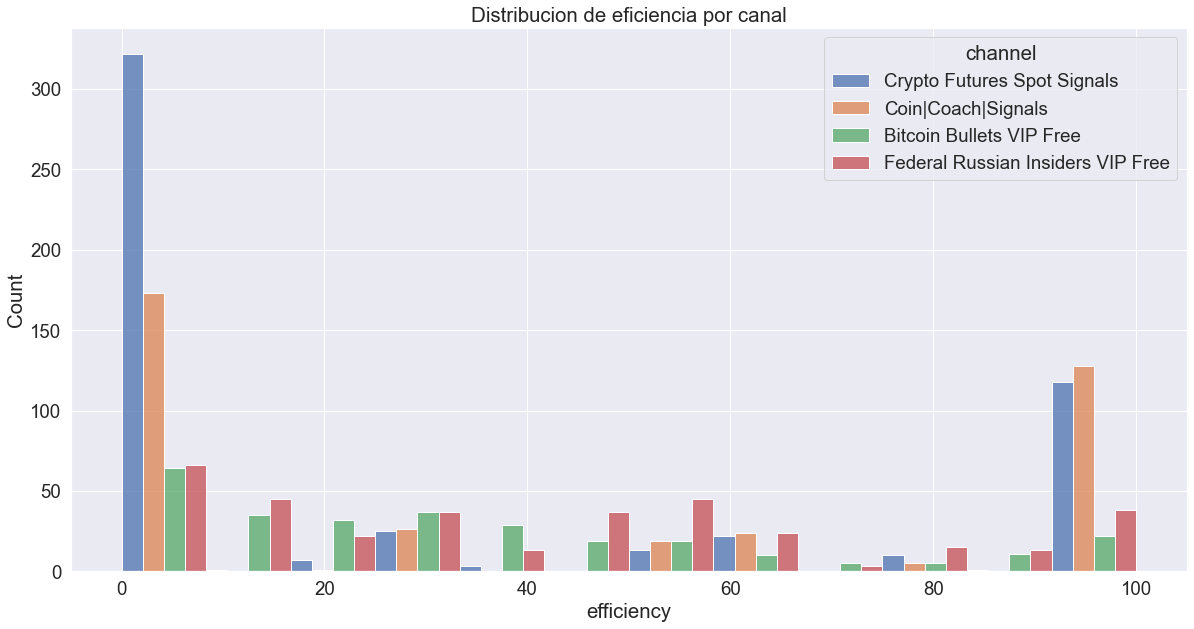

In [23]:
sns.histplot(df_sygnals, x='efficiency', hue = 'channel', multiple="dodge")
plt.title("Distribucion de eficiencia por canal")


Text(0.5, 1.0, 'Distribucion de eficiencia por canal')

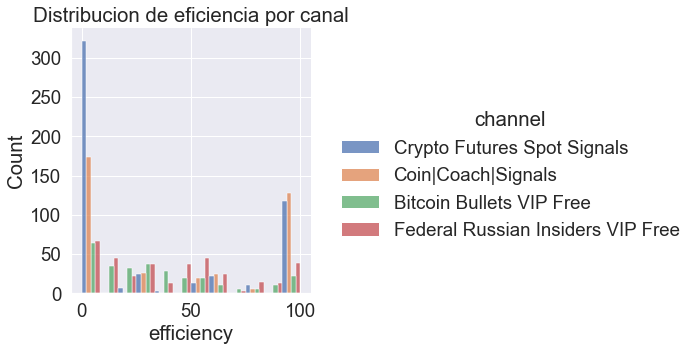

In [24]:
sns.displot(df_sygnals, x='efficiency', hue = 'channel', multiple="dodge")
plt.title("Distribucion de eficiencia por canal")

## Vistazo de cantidad de operaciones con ganancia y sin ganancia

In [25]:
is_profit:pd.Series=df_sygnals["efficiency"].dropna().agg(lambda x: "profit" if x > 0 else "no_profit")
is_profit.name="is_profit"

In [26]:
df_isprofit=pd.concat([df_sygnals[["efficiency","channel","symbol","_id"]],is_profit],axis=1)

Text(0.5, 1.0, 'Distribucion de profit por canal')

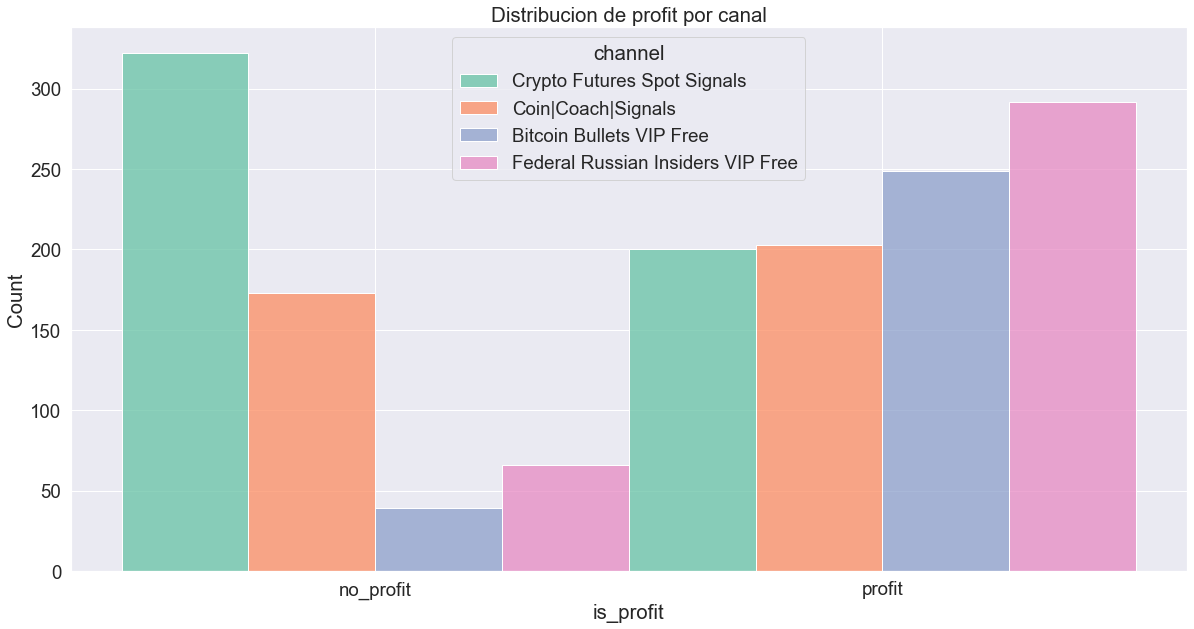

In [27]:
sns.histplot(df_isprofit, x='is_profit', hue = 'channel', multiple="dodge",palette="Set2")
plt.title("Distribucion de profit por canal")

## Cantidad de operaciones por criptomoneda

### Cantidad de symbolos y pares

In [28]:
df_sygnals["symbol"].unique()

<StringArray>
[  'BCHUSDT',   'ETHUSDT',   'BTCUSDT',  'BZRXUSDT',  'IOTAUSDT',  'YFIIUSDT',
   'RENUSDT',   'RSRUSDT',   'XRPUSDT',    'ONEBTC',
 ...
   'ANTUSDT',   'ANCUSDT', 'WAVESUSDT',   'BNXUSDT',   'GMTUSDT',  'DASHUSDT',
  'FLOWUSDT', 'JASMYUSDT',   'ENSUSDT',   'INJUSDT']
Length: 242, dtype: string

In [29]:
df_sygnals.columns

Index(['_id', 'symbol', 'is_long', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'date', 'channel',
       'message_link', 'dates_entry', 'dates_stoploss', 'dates_profit',
       'efficiency', 'error_ta_recomendation', 'error_prophettesting',
       'error_backtesting', 'primary_currencies', 'segundary_currencies',
       'type_leverage', 'is_cross_leverage', 'percent_leverage',
       'percent_trailing_configuration', 'AO', 'RSI', 'ADX', 'CCI20', 'Stoch',
       'first_dates_entry', 'first_dates_stoploss', 'first_dates_profit'],
      dtype='object')

In [30]:
df_sygnals['primary_currencies'].unique()


<StringArray>
[   'BCH',    'ETH',    'BTC',   'BZRX',   'IOTA',   'YFII',    'REN',
    'RSR',    'XRP',    'ONE',
 ...
    'KSM',   'CTSI', 'PEOPLE',    'ANC',    'BNX',    'GMT',   'DASH',
   'FLOW',  'JASMY',    'ENS']
Length: 199, dtype: string

In [31]:
df_sygnals['segundary_currencies'].unique()


<StringArray>
['USDT', 'BTC']
Length: 2, dtype: string

In [32]:
'Crypto Futures Spot Signals', 'Coin|Coach|Signals', 'Bitcoin Bullets VIP Free', 'Federal Russian Insiders VIP Free'

('Crypto Futures Spot Signals',
 'Coin|Coach|Signals',
 'Bitcoin Bullets VIP Free',
 'Federal Russian Insiders VIP Free')

### 'Crypto Futures Spot Signals'

C:\Users\Joan\AppData\Local\Temp\ipykernel_9812\2707942534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)


cantidad de symbolos 208
cantidad por symbolo symbol
BTCUSDT    43
ETHUSDT    40
LTCUSDT    18
XRPUSDT    10
BNBUSDT    10
SOLUSDT     9
EOSUSDT     8
dtype: int64


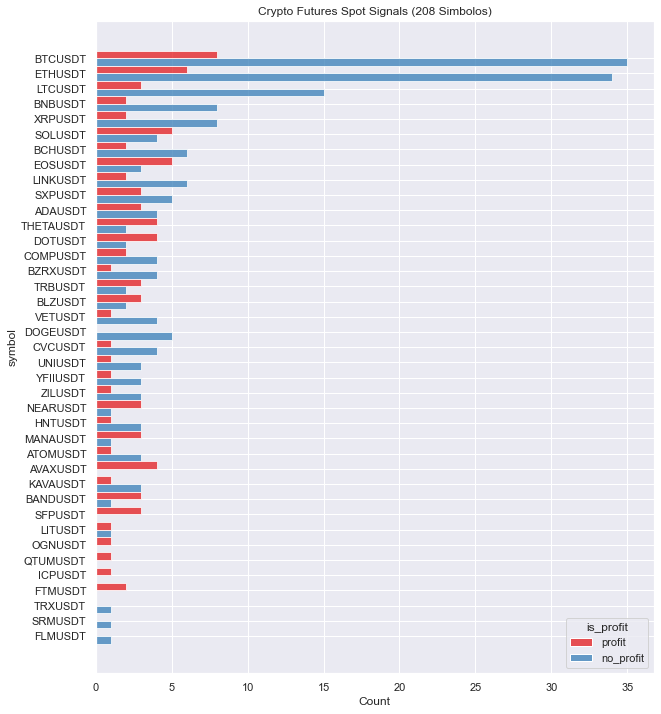

In [33]:
#construir df para graficar

canal='Crypto Futures Spot Signals'

df_prf=df_isprofit.groupby(["channel"]).get_group(canal)
df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)
df_prf.sort_values("quantity",ascending=False)



sns.set(rc={'figure.figsize':(10,12)},font_scale=1)
sns.histplot(df_prf.sort_values("quantity",ascending=False).head(270), y="symbol", hue= 'is_profit', multiple="dodge",palette="Set1")

plt.title(canal+f' ({len(df_prf["symbol"].unique())} Simbolos)')

print(f"""cantidad de symbolos {len(df_prf["symbol"].unique())}""")
print(f"""cantidad por symbolo {df_prf.value_counts("symbol").head(7)}""")


### 'Coin|Coach|Signals'

C:\Users\Joan\AppData\Local\Temp\ipykernel_9812\1136503345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)


cantidad de symbolos 112
cantidad por symbolo symbol
BELUSDT      15
LITUSDT      12
BLZUSDT      11
NKNUSDT      10
ALPHAUSDT    10
CHZUSDT       9
FLMUSDT       9
dtype: int64


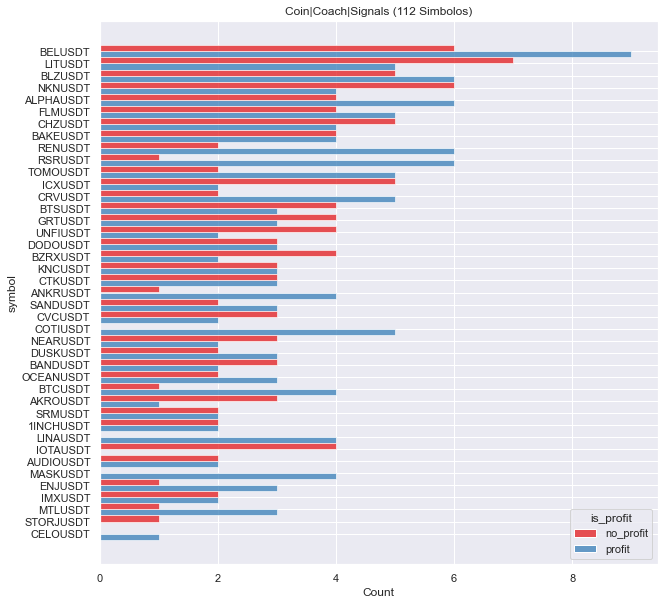

In [34]:
#construir df para graficar

canal='Coin|Coach|Signals'

df_prf=df_isprofit.groupby(["channel"]).get_group(canal)
df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)
df_prf.sort_values("quantity",ascending=False)



sns.set(rc={'figure.figsize':(10,10)},font_scale=1)
sns.histplot(df_prf.sort_values("quantity",ascending=False).head(251), y="symbol", hue= 'is_profit', multiple="dodge",palette="Set1")

plt.title(canal+f' ({len(df_prf["symbol"].unique())} Simbolos)')

print(f"""cantidad de symbolos {len(df_prf["symbol"].unique())}""")
print(f"""cantidad por symbolo {df_prf.value_counts("symbol").head(7)}""")

### 'Bitcoin Bullets VIP Free'

C:\Users\Joan\AppData\Local\Temp\ipykernel_9812\1328059395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)


cantidad de symbolos 65
cantidad por symbolo symbol
AVAXUSDT    17
LTCUSDT     15
ETHUSDT     14
DOTUSDT     11
BNBUSDT     11
DOGEUSDT    10
FILUSDT      9
dtype: int64


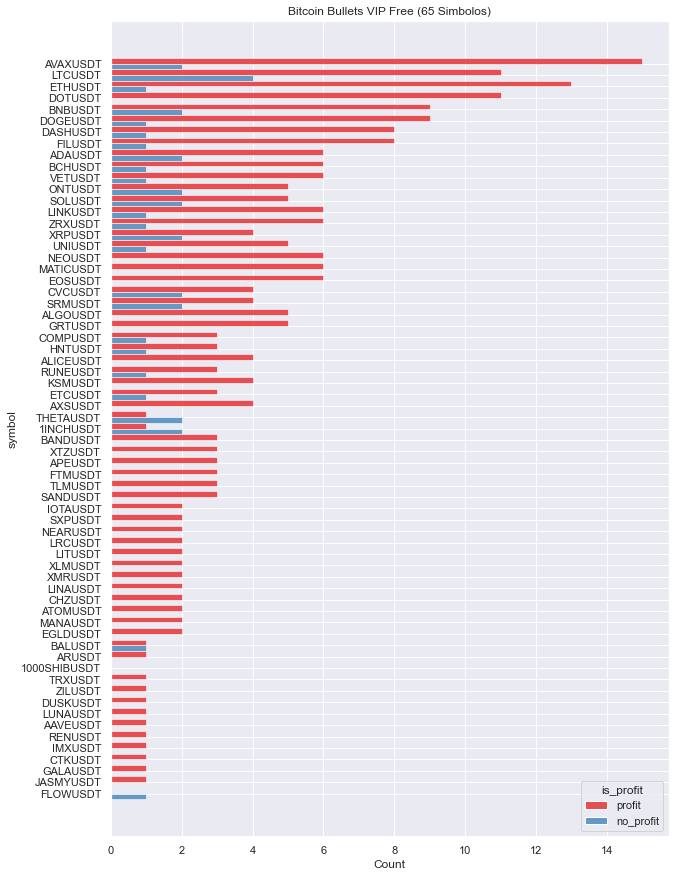

In [35]:
#construir df para graficar

canal='Bitcoin Bullets VIP Free'

df_prf=df_isprofit.groupby(["channel"]).get_group(canal)
df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)
df_prf.sort_values("quantity",ascending=False)



sns.set(rc={'figure.figsize':(10,15)},font_scale=1)
sns.histplot(df_prf.sort_values("quantity",ascending=False), y="symbol", hue= 'is_profit', multiple="dodge",palette="Set1")

plt.title(canal+f' ({len(df_prf["symbol"].unique())} Simbolos)')

print(f"""cantidad de symbolos {len(df_prf["symbol"].unique())}""")
print(f"""cantidad por symbolo {df_prf.value_counts("symbol").head(7)}""")

### 'Federal Russian Insiders VIP Free'

C:\Users\Joan\AppData\Local\Temp\ipykernel_9812\3453393308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)


cantidad de symbolos 68
cantidad por symbolo symbol
ETHUSDT    25
LTCUSDT    18
XRPUSDT    17
ZRXUSDT    14
EOSUSDT    14
XTZUSDT    14
ADAUSDT    13
dtype: int64


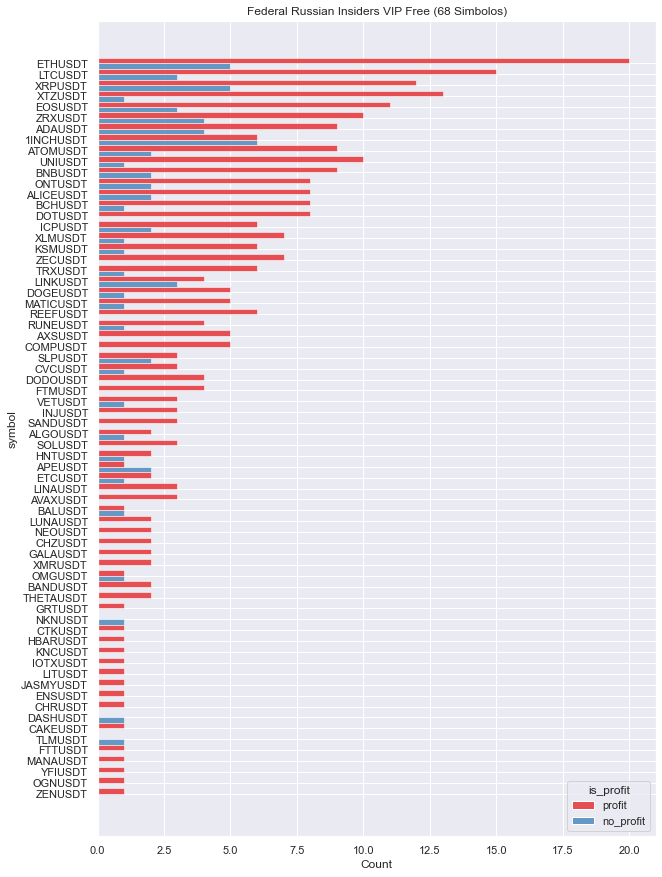

In [36]:
#construir df para graficar

canal='Federal Russian Insiders VIP Free'

df_prf=df_isprofit.groupby(["channel"]).get_group(canal)
df_prf["quantity"]=df_prf.agg(lambda x: (dict(df_prf.value_counts("symbol"))[x["symbol"]]/len(df_prf["symbol"].unique()))*100,axis=1)
df_prf.sort_values("quantity",ascending=False)



sns.set(rc={'figure.figsize':(10,15)},font_scale=1)
sns.histplot(df_prf.sort_values("quantity",ascending=False), y="symbol", hue= 'is_profit', multiple="dodge",palette="Set1")
plt.title(canal+f' ({len(df_prf["symbol"].unique())} Simbolos)')


print(f"""cantidad de symbolos {len(df_prf["symbol"].unique())}""")
print(f"""cantidad por symbolo {df_prf.value_counts("symbol").head(7)}""")

## variaciones de tiempos segun canal

In [37]:
df_sygnals.columns,df_sygnals.shape

(Index(['_id', 'symbol', 'is_long', 'is_entry_market', 'entry_targets',
        'take_profit_targets', 'stop_targets', 'date', 'channel',
        'message_link', 'dates_entry', 'dates_stoploss', 'dates_profit',
        'efficiency', 'error_ta_recomendation', 'error_prophettesting',
        'error_backtesting', 'primary_currencies', 'segundary_currencies',
        'type_leverage', 'is_cross_leverage', 'percent_leverage',
        'percent_trailing_configuration', 'AO', 'RSI', 'ADX', 'CCI20', 'Stoch',
        'first_dates_entry', 'first_dates_stoploss', 'first_dates_profit'],
       dtype='object'),
 (1554, 31))

In [38]:
df_isprofit.columns,df_isprofit["channel"].unique()

(Index(['efficiency', 'channel', 'symbol', '_id', 'is_profit'], dtype='object'),
 <StringArray>
 [      'Crypto Futures Spot Signals',                'Coin|Coach|Signals',
           'Bitcoin Bullets VIP Free', 'Federal Russian Insiders VIP Free']
 Length: 4, dtype: string)

In [39]:
df_times.columns,df_times.shape

(Index(['date', 'first_dates_profit', 'first_dates_stoploss',
        'first_dates_entry', 'd_e', 'd_p', 'e_p', 'd_s'],
       dtype='object'),
 (1554, 8))

In [40]:
def delta_time_ca(x):
    return str(timedelta(seconds=x))

In [41]:
df_sygnals_2=pd.concat([df_isprofit,df_times],axis=1)

In [42]:
df_sygnals_2[['d_e', 'd_p', 'e_p', 'd_s']]=df_sygnals_2[['d_e', 'd_p', 'e_p', 'd_s']].transform(lambda x: x/3600,axis=1).astype(int)


In [43]:
df_sygnals_2_group=df_sygnals_2.groupby(["channel","is_profit"])

In [44]:
profit_type=df_sygnals_2["is_profit"].dropna().unique()

In [45]:
df_sygnals_2_group.get_group((channels[0],profit_type[1])).value_counts("d_s").head(7),df_sygnals_2_group.get_group((channels[0],profit_type[0])).value_counts("d_e").head(7)

(d_s
 0      7
 6      5
 372    4
 4      3
 25     3
 69     3
 174    2
 dtype: int64,
 d_e
 0      295
 1        7
 2        5
 12       2
 42       1
 441      1
 273      1
 dtype: int64)

In [46]:
mask=(df_sygnals_2["is_profit"]=="profit") & (df_sygnals_2["channel"]=="Crypto Futures Spot Signals") & (df_times["d_e"]!=False)& (df_times["d_p"]!=False) & (df_times["e_p"]!=False) & (df_times["d_s"]!=False)
df_sygnals_2[mask][['d_e', 'd_p', 'e_p', 'd_s']].apply([max,min,np.mean, np.median]).apply(lambda x : list(map(delta_time_ca,x)) )

,d_e,d_p,e_p,d_s
max,0:48:49,0:54:19,0:08:23,3:53:43
min,0:00:00,0:00:00,0:00:00,0:00:03
mean,0:00:20.398844,0:00:52.109827,0:00:31.468208,0:12:53.485549
median,0:00:00,0:00:09,0:00:05,0:02:57


In [47]:
# sns.set(style="darkgrid")

# fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# plt.subplot()

# sns.histplot(data=df_sygnals_2_group.get_group((channels[0],profit_type[1])).value_counts('d_e').sort_values(ascending=False), label=channels[0], color="red", ax=axs[0])
# sns.histplot(data=df_sygnals_2_group.get_group((channels[1],profit_type[1])).value_counts('d_e').sort_values(ascending=False), label=channels[1], color="skyblue", ax=axs[1])
# sns.histplot(data=df_sygnals_2_group.get_group((channels[2],profit_type[1])).value_counts('d_e').sort_values(ascending=False), label=channels[2], color="olive", ax=axs[2])
# sns.histplot(data=df_sygnals_2_group.get_group((channels[3],profit_type[1])).value_counts('d_e').sort_values(ascending=False), label=channels[3], color="green", ax=axs[3])
# plt.show()

In [48]:
profit_type[1]

'profit'

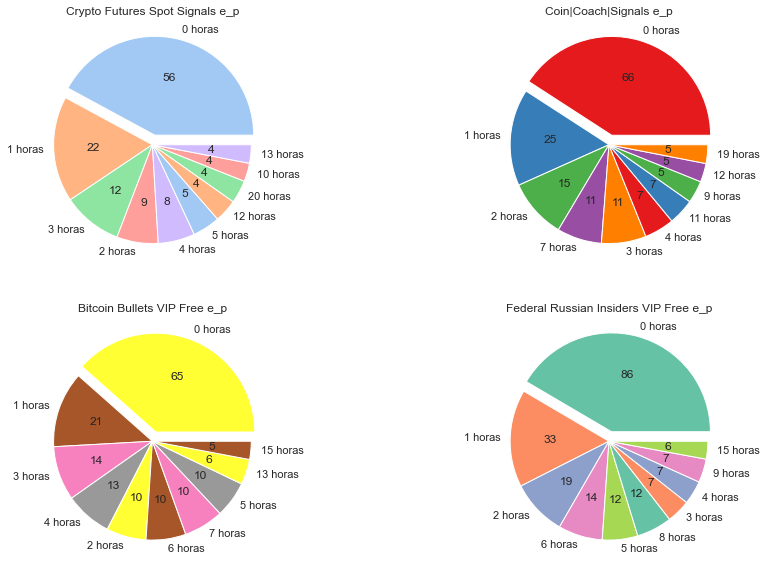

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

length=10
myexplode = [0.1]+[0]*(length-1)

# ---------------- plot 1
plt.subplot(2,2,1)

the_pie=dict(df_sygnals_2_group.get_group((channels[0],profit_type[1])).value_counts('e_p').head(length))
horas=list(map(lambda x: str(x)+" horas",list(the_pie.keys())))
count=list(the_pie.values())

colors = sns.color_palette('pastel')[0:5]
plt.pie(x=count, labels = horas, colors = colors, explode=myexplode, autopct= lambda x: int(x / 100.*np.sum(count)))
plt.title(channels[0]+" e_p")

# ---------------- plot 2
plt.subplot(2,2,2)

the_pie=dict(df_sygnals_2_group.get_group((channels[1],profit_type[1])).value_counts('e_p').head(length))
horas=list(map(lambda x: str(x)+" horas",list(the_pie.keys())))
count=list(the_pie.values())

colors = sns.color_palette('Set1')[0:5]
plt.pie(x=count, labels = horas, colors = colors, explode=myexplode, autopct= lambda x: int(x / 100.*np.sum(count)))
plt.title(channels[1]+" e_p")

# ---------------- plot 3

plt.subplot(2,2,3)

the_pie=dict(df_sygnals_2_group.get_group((channels[2],profit_type[1])).value_counts('e_p').head(length))
horas=list(map(lambda x: str(x)+" horas",list(the_pie.keys())))
count=list(the_pie.values())

colors = sns.color_palette('Set1')[5:10]
plt.pie(x=count, labels = horas, colors = colors, explode=myexplode, autopct= lambda x: int(x / 100.*np.sum(count)))
plt.title(channels[2]+" e_p")

# ---------------- plot 4

plt.subplot(2,2,4)

the_pie=dict(df_sygnals_2_group.get_group((channels[3],profit_type[1])).value_counts('e_p').head(length))
horas=list(map(lambda x: str(x)+" horas",list(the_pie.keys())))
count=list(the_pie.values())

colors = sns.color_palette('Set2')[0:5]
plt.pie(x=count, labels = horas, colors = colors, explode=myexplode, autopct= lambda x: int(x / 100.*np.sum(count)))
plt.title(channels[3]+" e_p")

plt.show()



In [50]:
# sns.set(rc={'figure.figsize':(10,5)},font_scale=1)
# sns.histplot(data=dict(df_sygnals_2_group.get_group((channels[0],profit_type[1])).value_counts('d_e')))
# plt.title("Tiempo entre publicacion y primera entrada (h)")
# plt.xlabel("horas")

In [51]:
# sns.set(rc={'figure.figsize':(10,5)},font_scale=1)
# sns.histplot(df_sygnals_2[mask][['d_e', 'd_p', 'e_p', 'd_s']].transform(lambda x: round(x/3600)).astype(int).value_counts('d_p'))
# plt.title("Tiempo entre publicacion y primera ganancia (h)")
# plt.xlabel("horas")

## activadores por analisis tecnico

In [52]:
df_sygnals.columns

Index(['_id', 'symbol', 'is_long', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'date', 'channel',
       'message_link', 'dates_entry', 'dates_stoploss', 'dates_profit',
       'efficiency', 'error_ta_recomendation', 'error_prophettesting',
       'error_backtesting', 'primary_currencies', 'segundary_currencies',
       'type_leverage', 'is_cross_leverage', 'percent_leverage',
       'percent_trailing_configuration', 'AO', 'RSI', 'ADX', 'CCI20', 'Stoch',
       'first_dates_entry', 'first_dates_stoploss', 'first_dates_profit'],
      dtype='object')

In [53]:
df_isprofit.columns

Index(['efficiency', 'channel', 'symbol', '_id', 'is_profit'], dtype='object')

In [54]:
df_ta_recomendation=pd.concat([df_sygnals[['error_ta_recomendation','is_long','date','AO', 'RSI', 'ADX', 'CCI20', 'Stoch']],df_isprofit],axis=1)

In [55]:
def confirm_is_long(x,ta):
    
    #no confirma ninguna tendencia
    y=0

    #Si confirma la tendencia que presenta la operación
    if (x["is_long"]==True and x[ta]=="long") or (x["is_long"]==False and x[ta]=="short"):
        y=1

    #confirma la tendencia opuesta de la presentada en la operación
    if (x["is_long"]==True and x[ta]=="short") or (x["is_long"]==False and x[ta]=="long"):
        y=-1
    
    return y

In [56]:
mask=(df_ta_recomendation['error_ta_recomendation'].isna()) & (~df_ta_recomendation['AO'].isna())
tas=['AO', 'RSI', 'ADX', 'CCI20', 'Stoch']
for ta in tas:
    df_ta_recomendation[ta+"_confirm_trend"]=df_ta_recomendation[mask][['is_long',"symbol","date",'AO', 'RSI', 'ADX', 'CCI20', 'Stoch','error_ta_recomendation']].agg(lambda x: confirm_is_long(x,ta),axis=1)

In [57]:
df_ta_recomendation.columns

Index(['error_ta_recomendation', 'is_long', 'date', 'AO', 'RSI', 'ADX',
       'CCI20', 'Stoch', 'efficiency', 'channel', 'symbol', '_id', 'is_profit',
       'AO_confirm_trend', 'RSI_confirm_trend', 'ADX_confirm_trend',
       'CCI20_confirm_trend', 'Stoch_confirm_trend'],
      dtype='object')

In [58]:
# df_ta_recomendation[['is_profit',
# 'AO_confirm_trend', 'RSI_confirm_trend', 'ADX_confirm_trend',
# 'CCI20_confirm_trend', 'Stoch_confirm_trend']].groupby(['is_profit','AO_confirm_trend']).count()
pd.concat([df_ta_recomendation[['is_profit','AO_confirm_trend','_id']].groupby(['is_profit','AO_confirm_trend']).count().rename(columns={"_id":'AO_confirm_trend'}),
df_ta_recomendation[['is_profit','RSI_confirm_trend','_id']].groupby(['is_profit','RSI_confirm_trend']).count().rename(columns={"_id":'RSI_confirm_trend'}),
df_ta_recomendation[['is_profit','ADX_confirm_trend','_id']].groupby(['is_profit','ADX_confirm_trend']).count().rename(columns={"_id":'ADX_confirm_trend'}),
df_ta_recomendation[['is_profit','CCI20_confirm_trend','_id']].groupby(['is_profit','CCI20_confirm_trend']).count().rename(columns={"_id":'CCI20_confirm_trend'}),
df_ta_recomendation[['is_profit','Stoch_confirm_trend','_id']].groupby(['is_profit','Stoch_confirm_trend']).count().rename(columns={"_id":'Stoch_confirm_trend'})],axis=1)

AO_confirm_trend  RSI_confirm_trend  ADX_confirm_trend  \
is_profit                                                                
no_profit -1.0                33                 28                 11   
           0.0               508                527                547   
           1.0                27                 13                 10   
profit    -1.0                37                 33                 16   
           0.0               791                806                830   
           1.0                44                 33                 26   

                CCI20_confirm_trend  Stoch_confirm_trend  
is_profit                                                 
no_profit -1.0                   37                   13  
           0.0                  495                  539  
           1.0                   36                   16  
profit    -1.0                   45                   19  
           0.0                  735                  814  
           1.0                   92                   39

In [59]:
mask=~((df_ta_recomendation['AO_confirm_trend']==0)&(df_ta_recomendation['RSI_confirm_trend']==0)&
(df_ta_recomendation['ADX_confirm_trend']==0)&(df_ta_recomendation['CCI20_confirm_trend']==0)& 
(df_ta_recomendation['Stoch_confirm_trend']==0))
mask2=""
df_multi_tas=df_ta_recomendation[mask][["_id","is_profit",'AO_confirm_trend', 'RSI_confirm_trend', 'ADX_confirm_trend','CCI20_confirm_trend', 'Stoch_confirm_trend']]

In [73]:
df_multi_tas["sum"]=df_multi_tas[['AO_confirm_trend', 'RSI_confirm_trend', 'ADX_confirm_trend','CCI20_confirm_trend', 'Stoch_confirm_trend']].dropna().sum(axis=1)
mask=(df_multi_tas["sum"]==-3) & (~df_multi_tas.iloc[:,:-2].all(1))
df_multi_tas[mask]


,_id,is_profit,AO_confirm_trend,RSI_confirm_trend,ADX_confirm_trend,CCI20_confirm_trend,Stoch_confirm_trend,sum
121,62ad0f9bad1335e0e3f3b052,no_profit,0.0,-1.0,0.0,-1.0,-1.0,-3.0
313,62ad0fa2ad1335e0e3f3b112,profit,0.0,-1.0,0.0,-1.0,-1.0,-3.0
527,62ad0fc5ad1335e0e3f3b1e8,profit,0.0,-1.0,0.0,-1.0,-1.0,-3.0
1216,62ad11adad1335e0e3f3b49c,profit,0.0,-1.0,0.0,-1.0,-1.0,-3.0


In [61]:
df_multi_tas[["is_profit","sum","_id"]].groupby(["is_profit","sum"]).count()

_id
is_profit sum      
no_profit -3.0    1
          -2.0   13
          -1.0   82
           0.0   10
           1.0   72
           2.0    8
           3.0    1
profit    -3.0    3
          -2.0   14
          -1.0   96
           0.0   17
           1.0  142
           2.0   30
           3.0    5